## Storytelling do projeto

A base escolhida para o projeto é a "Credit Card Transactions Fraud Detection Dataset" do Kaggle, podendo ser acessada através do link https://www.kaggle.com/datasets/kartik2112/fraud-detection/data.

Trata-se de uma base contendo transações simuladas de cartão de crédito com a marcação de legítimas ou fraude.

A base possui 22 colunas, sendo elas:

| Campo | Descrição |
|-------|-----------|
| trans_date_trans_time | Data e hora da transação |
| cc_num | Número da conta corrente do cliente |
| merchant | Comerciante em que a transação foi efetuada |
| category | Categoria do tipo da transação efetuada |
| amt | Valor da transação |
| first | Primeiro nome do cliente |
| last | Último nome do cliente |
| gender | Gênero do cliente |
| street | Rua de residência do cliente |
| city | Cidade de residência do cliente |
| state | Estado de residência do cliente |
| zip | CEP de residência do cliente |
| lat | Latitude da residência do cliente |
| long | Longitude da residência do cliente |
| city_pop | Tamanho populacional da cidade do cliente |
| job | Profissão do cliente |
| dob | Data de nascimento do cliente |
| trans_num | Identificação da transação |
| unix_time | Identificação de horário da transação |
| merch_lat | Latitude do comércio em que foi feita a transação |
| merch_long | Longitude do comércio em que foi feita a transação |
| is_fraud | Marcação se a transação foi fraude ou não |


O objetivo é do projeto desenvolver um modelo para prever transações que sejam fraude.


### 1. Importação de bibliotecas

In [224]:
# imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
#import xgboost as xgb

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import auc, roc_curve

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

#retirando os warnings
import warnings
warnings.filterwarnings('ignore')


### 2. Carregamento da base

In [225]:
df = pd.read_csv("base_fraude.csv")

In [226]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### 3. Análise exploratória

Verificado o desbalanceamento entre as clases, feita a análise de correlação e a distribuição das variáveis.

A base possuia somente 1 dado ausente, que foi excluído. Ela apresenta dados númericos e categóricos.

Foi feita a inclusão de um campo representando o período em que a transação ocorreu.

Retiradas as colunas que não eram necessárias para o dataset.

Como a base é muito grande, foi feita uma amostragem.

In [227]:
df.shape

(1296675, 23)

In [228]:
#Base possui variáveis categóricas e núméricas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [229]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [230]:
#Verificando a quantidade de valores únicos nas colunas categóricas
df[["city","state","job", "merchant","category","gender"]].nunique()

,0
city,894
state,51
job,494
merchant,693
category,14
gender,2


In [231]:
#Verificando se a base contém valores nulos

nulos = pd.DataFrame({
    "Quantidade" : df.isnull().sum(),
    "Percentual": df.isnull().sum()/len(df)*100
    })
nulos

,Quantidade,Percentual
Unnamed: 0,0,0.0
trans_date_trans_time,0,0.0
cc_num,0,0.0
merchant,0,0.0
category,0,0.0
amt,0,0.0
first,0,0.0
last,0,0.0
gender,0,0.0
street,0,0.0


In [232]:
#Como só possui 1 registro com valores nulos, optei por excluir o registro

df = df.dropna()

#Verificando se a base contém valores nulos

nulos = pd.DataFrame({
    "Quantidade" : df.isnull().sum(),
    "Percentual": df.isnull().sum()/len(df)*100
    })
nulos

,Quantidade,Percentual
Unnamed: 0,0,0.0
trans_date_trans_time,0,0.0
cc_num,0,0.0
merchant,0,0.0
category,0,0.0
amt,0,0.0
first,0,0.0
last,0,0.0
gender,0,0.0
street,0,0.0


In [233]:
#Transformando o campo de horário da transação para segregar os dados por períodos do dia em que ocorreram as transações
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])

In [234]:
#separando o horário da transação para aplicação da função
df["hora"] = df["trans_date_trans_time"].dt.hour

In [235]:
#definição da função e aplicação

def classificar_periodo_dia(hora):
    if 0 >= hora <6:
        return "madrugada"
    elif 6 >= hora < 12:
        return "manha"
    elif 12 <= hora < 18:
        return "tarde"
    else:
        return "noite"

df["periodo"] = df["hora"].apply(classificar_periodo_dia)

In [236]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hora,periodo
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,madrugada
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,madrugada
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,madrugada
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,madrugada
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,madrugada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,12,tarde
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,12,tarde
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,12,tarde
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,12,tarde


In [237]:
# Retirando as colunas que não são necessárias para o modelo

df = df.drop([ "Unnamed: 0", "unix_time", "hora", "cc_num", "first", "last", "street", "city", "state", "zip", "trans_num", "trans_date_trans_time", "dob", "job", "merchant"], axis=1)

In [238]:
df

,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,periodo
0,misc_net,4.97,F,36.0788,-81.1781,3495,36.011293,-82.048315,0,madrugada
1,grocery_pos,107.23,F,48.8878,-118.2105,149,49.159047,-118.186462,0,madrugada
2,entertainment,220.11,M,42.1808,-112.2620,4154,43.150704,-112.154481,0,madrugada
3,gas_transport,45.00,M,46.2306,-112.1138,1939,47.034331,-112.561071,0,madrugada
4,misc_pos,41.96,M,38.4207,-79.4629,99,38.674999,-78.632459,0,madrugada
...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,M,37.7175,-112.4777,258,36.841266,-111.690765,0,tarde
1296671,food_dining,51.70,M,39.2667,-77.5101,100,38.906881,-78.246528,0,tarde
1296672,food_dining,105.93,M,32.9396,-105.8189,899,33.619513,-105.130529,0,tarde
1296673,food_dining,74.90,M,43.3526,-102.5411,1126,42.788940,-103.241160,0,tarde


In [239]:
#verificando o balanceamento das classes
#a base é muito desbalanciada
df["is_fraud"].value_counts(normalize=True)

,proportion
is_fraud,
0,0.994211
1,0.005789


array([[<Axes: title={'center': 'is_fraud'}>]], dtype=object)

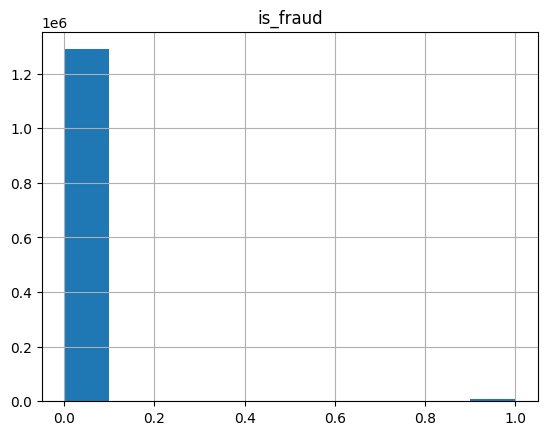

In [240]:
df.hist("is_fraud")

In [241]:
#separando o target do restante da base
x = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

In [249]:
#como a base é muito grande, tive problemas para rodar no meu computador,
#por isso fiz uma amostragem da base mantendo a proporção do target através do parâmetro stratify do train_test_split
x_sample, _, y_sample, _ = train_test_split(x, y, train_size=0.02,stratify=y)

In [250]:
x_sample.shape

(25933, 9)

In [251]:
y_sample.shape

(25933,)

In [252]:
#verificando se o a proporção do target se manteve a mesma
y_sample.value_counts(normalize=True)

,proportion
is_fraud,
0,0.994216
1,0.005784


In [253]:
#separando as variáveis numéricas para verificar as distribuições e correlações entre variáveis
x_numerico = x_sample.select_dtypes(include=["int64", "float64"])

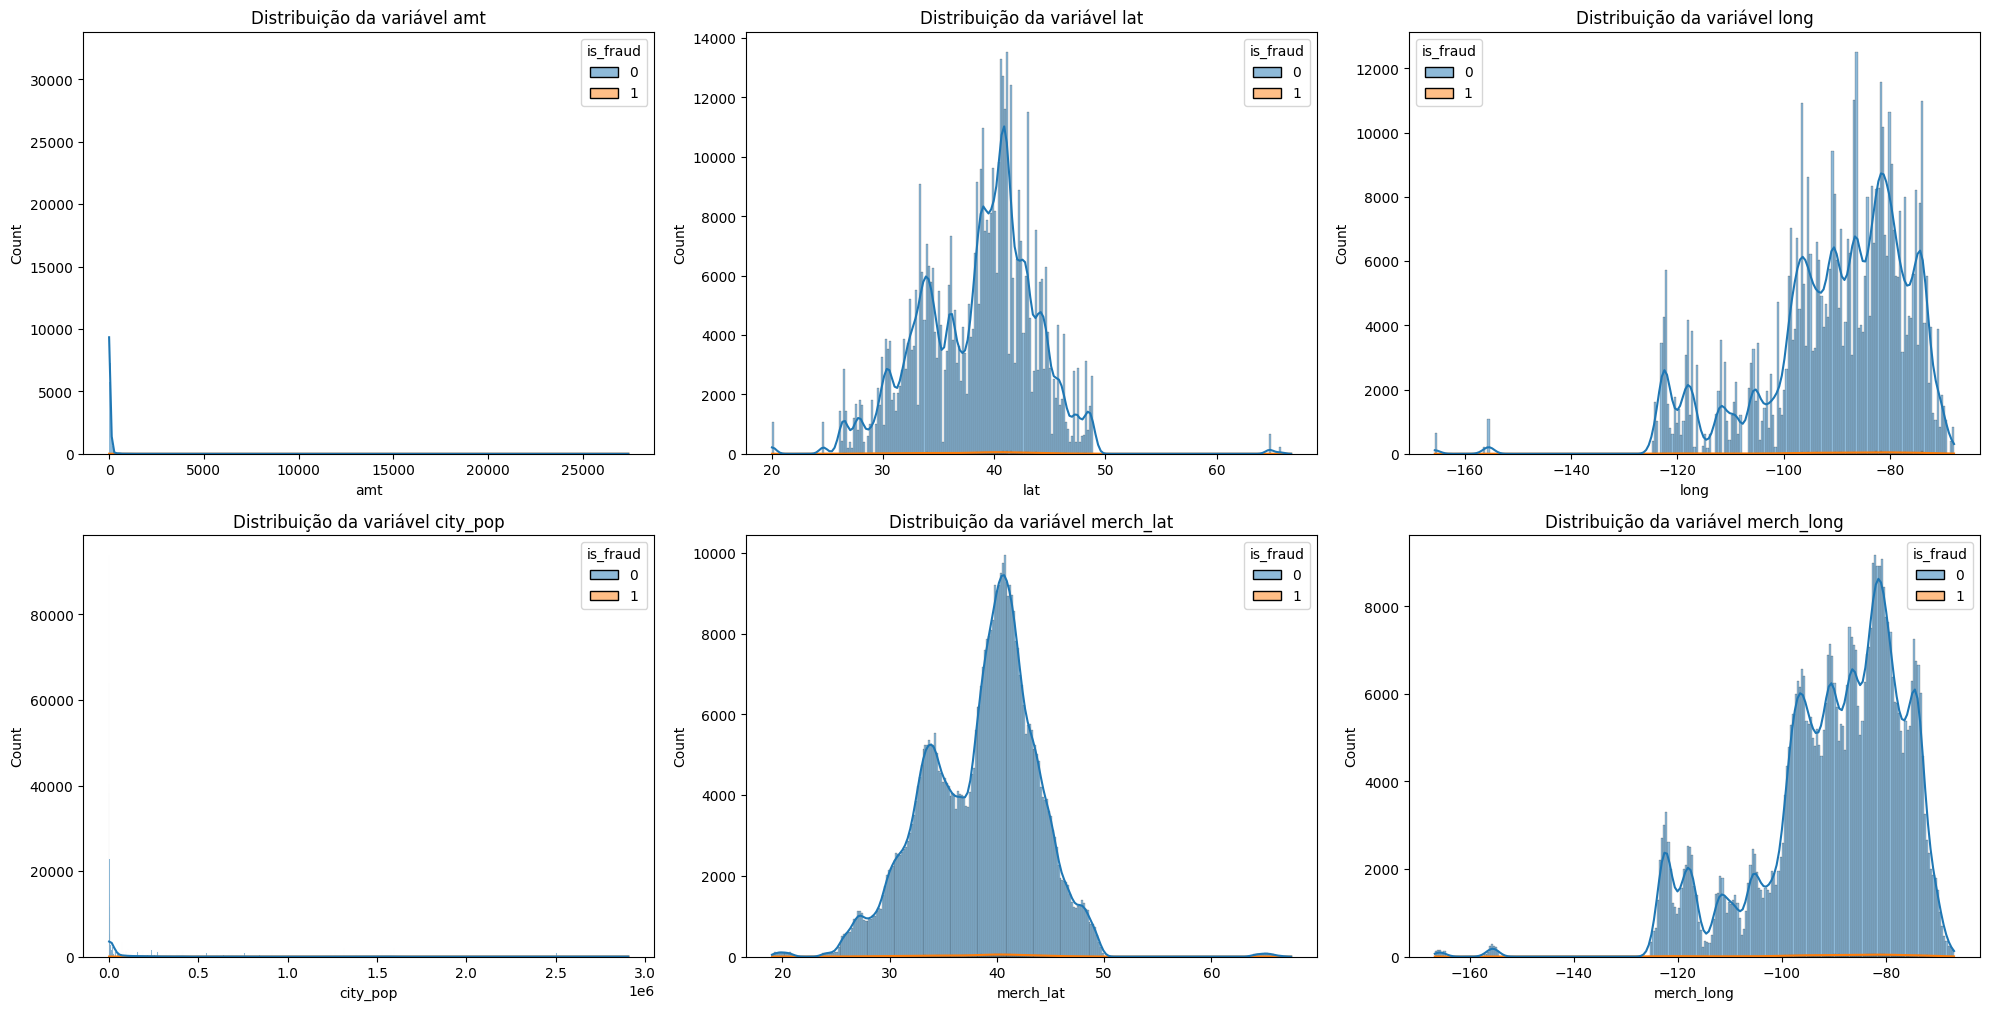

In [219]:
#verificando a distribuição das variáveis númericas

linhas, colunas = x_sample.shape

fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(20, 50))
axes = axes.flatten()


for i, coluna in enumerate(x_numerico.columns):
    sns.histplot(data=x_numerico, x=coluna, kde=True, hue=y_sample, ax=axes[i])
    axes[i].set_title(f"Distribuição da variável {coluna}")

# Remove subplots não utilizados (caso X tenha menos de 32 colunas)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('histogramas.png')
plt.show()

In [254]:
#verificando a correlação entre as variáveis
x_numerico.corr()

,amt,lat,long,city_pop,merch_lat,merch_long
amt,1.000000,-0.002569,-0.005625,0.017353,-0.002522,-0.005587
lat,-0.002569,1.000000,-0.034320,-0.158950,0.993656,-0.034280
long,-0.005625,-0.034320,1.000000,-0.058556,-0.035124,0.999122
city_pop,0.017353,-0.158950,-0.058556,1.000000,-0.158392,-0.058626
merch_lat,-0.002522,0.993656,-0.035124,-0.158392,1.000000,-0.035110
merch_long,-0.005587,-0.034280,0.999122,-0.058626,-0.035110,1.000000


<Axes: >

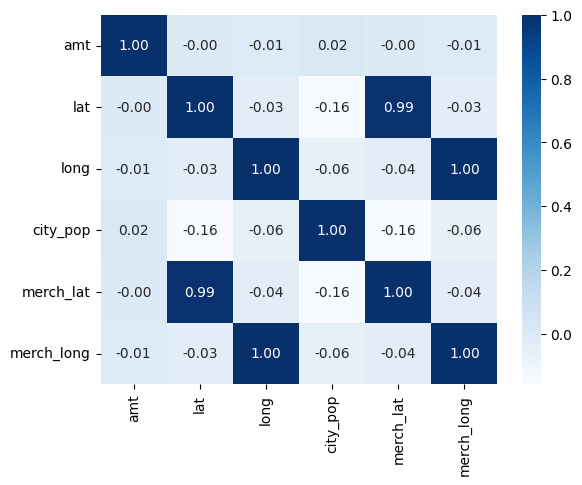

In [255]:
sns.heatmap(x_numerico.corr(), annot=True, cmap="Blues", fmt=".2f")

### 4. Pré-processamento

A base de treino e teste foi separada.

Na pipeline, as colunas númericas e categóricas foram separadas para aplicação da padronização e do one-hot-encoding

In [256]:
x_train, x_test,y_train, y_test = train_test_split(x_sample,y_sample, stratify=y_sample, test_size=0.2)

In [257]:
x_train.shape

(20746, 9)

In [258]:
x_test.shape

(5187, 9)

In [259]:
#separando as variáveis categóricas e númericas pois terão tratamentos diferentes na pipeline

x_train_numerico = x_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
x_train_categorico = x_train.select_dtypes(exclude=["int64", "float64"]).columns.tolist()

In [260]:
#pipelines para cada tipo de dado
#númericos serão padronizados através do standardscaler e os categóricos serão transformados através do onehotencoder

transformer_numerico = Pipeline(
    steps=[
        ("scaler", StandardScaler() )
    ]
)

transformer_categorico = Pipeline(
    steps=[
        ("onehot", OneHotEncoder() )
    ]
)

In [261]:
preprocessor = ColumnTransformer(
    transformers=[
        ('colunas_numericas', transformer_numerico, x_train_numerico),
        ('colunas_categoricas', transformer_categorico, x_train_categorico)
    ]

)

### 5. Treinamento, Validação e Teste


In [262]:
modelos = {
    "LG - Logistic Regression": LogisticRegression(random_state=42),
    "LG - Logistic Regression cw": LogisticRegression(random_state=42, class_weight="balanced"),
    "DT - Decision Tree md10 gini": DecisionTreeClassifier(max_depth=10, criterion="gini", random_state=42),
    "DT - Decision Tree md5 gini": DecisionTreeClassifier(max_depth=10, criterion= "gini", random_state=42),
    "DT - Decision Tree md5 entropy": DecisionTreeClassifier(max_depth=10, criterion= "entropy", random_state=42),
    "DT - Decision Tree md5 entropy": DecisionTreeClassifier(max_depth=10, criterion= "entropy", random_state=42),
    "RF - Random Forest ne50 md10 gini": RandomForestClassifier(max_depth=10, n_estimators=50, criterion="gini"),
    "RF - Random Forest ne100 md10 gini": RandomForestClassifier(max_depth=10, n_estimators=100, criterion="gini"),
    "RF - Random Forest ne100 md10 gini": RandomForestClassifier(max_depth=10, n_estimators=100, criterion="gini"),
    "RF - Random Forest ne100 md10 entropy": RandomForestClassifier(max_depth=10, n_estimators=100, criterion="entropy"),
    "KNN - KNN k5 euclidean": KNeighborsClassifier(n_neighbors=5, metric="euclidean"),
    "KNN - KNN k10 euclidean": KNeighborsClassifier(n_neighbors=10, metric="euclidean"),
    "KNN - KNN k15 euclidean": KNeighborsClassifier(n_neighbors=15, metric="euclidean"),
    "KNN - KNN k20 euclidean": KNeighborsClassifier(n_neighbors=20, metric="euclidean"),
    "KNN - KNN k5 manhatan": KNeighborsClassifier(n_neighbors=5, metric="manhattan"),
    "KNN - KNN k10 manhatan": KNeighborsClassifier(n_neighbors=10, metric="manhattan"),
    "KNN - KNN k15 manhatan": KNeighborsClassifier(n_neighbors=15, metric="manhattan"),
    # "SVM - SVM linear ": SVC(probability=True, kernel="linear"), #não consegui rodar no meu computador
    # "SVM - SVM rbf ": SVC(probability=True, kernel="rbf"), #não consegui rodar no meu computador
}

In [263]:
#separação do número de folds do cross-validate, usando o StratifidKFold pois a base é desbalanceada
cv = StratifiedKFold(n_splits=5, shuffle=True)

In [264]:
preprocessor

ColumnTransformer(transformers=[('colunas_numericas',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['amt', 'lat', 'long', 'city_pop', 'merch_lat',
                                  'merch_long']),
                                ('colunas_categoricas',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 ['category', 'gender', 'periodo'])])

Treinando o modelo: LG - Logistic Regression 


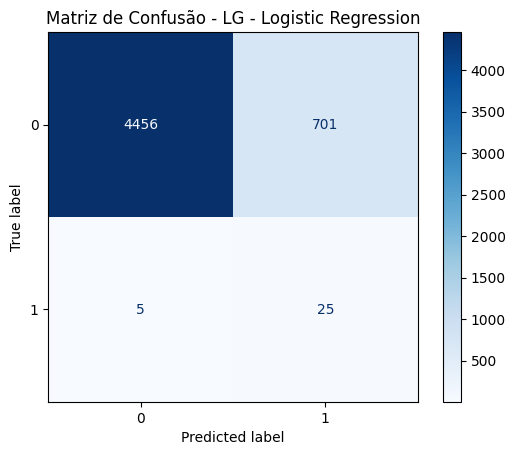

Treinando o modelo: LG - Logistic Regression cw 


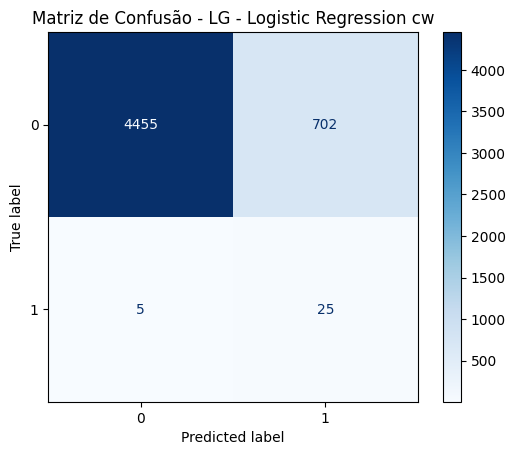

Treinando o modelo: DT - Decision Tree md10 gini 


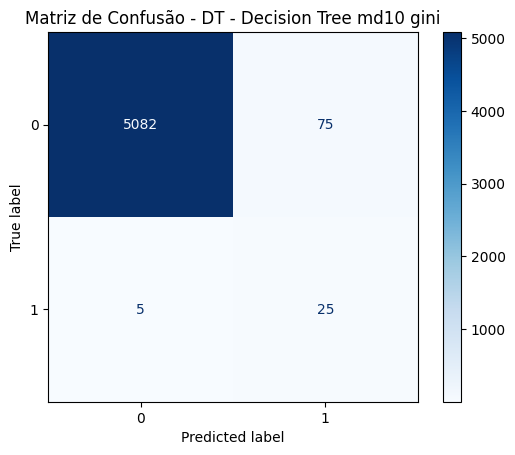

Treinando o modelo: DT - Decision Tree md5 gini 


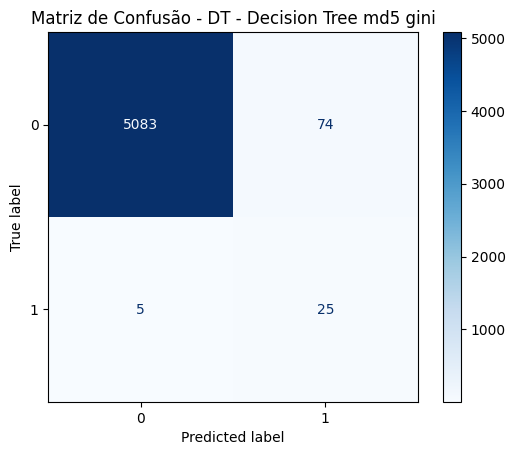

Treinando o modelo: DT - Decision Tree md5 entropy 


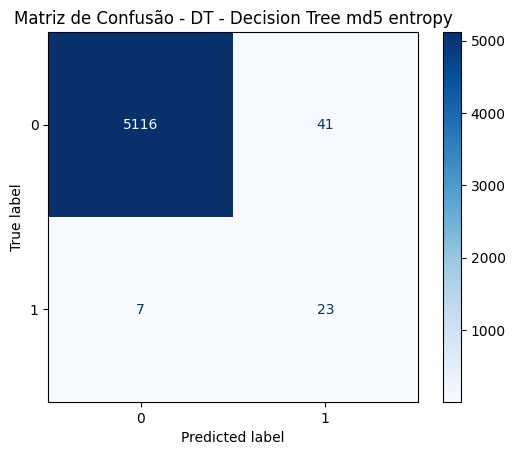

Treinando o modelo: RF - Random Forest ne50 md10 gini 


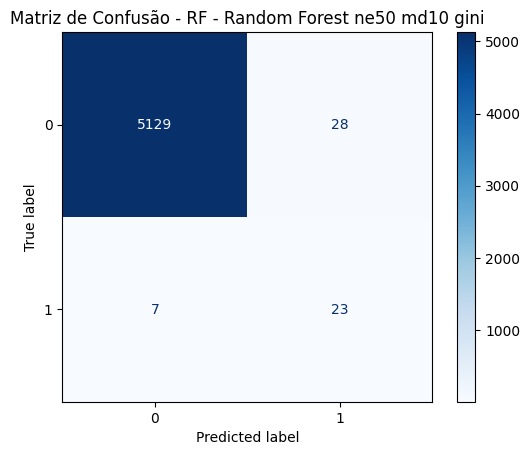

Treinando o modelo: RF - Random Forest ne100 md10 gini 


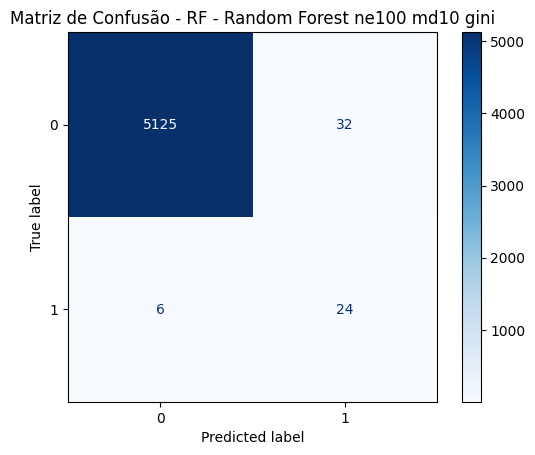

Treinando o modelo: RF - Random Forest ne100 md10 entropy 


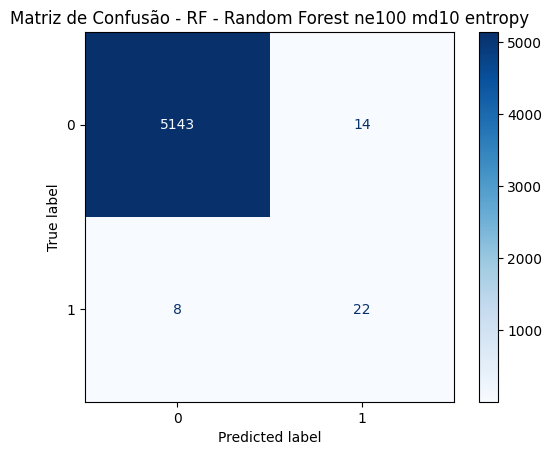

Treinando o modelo: KNN - KNN k5 euclidean 


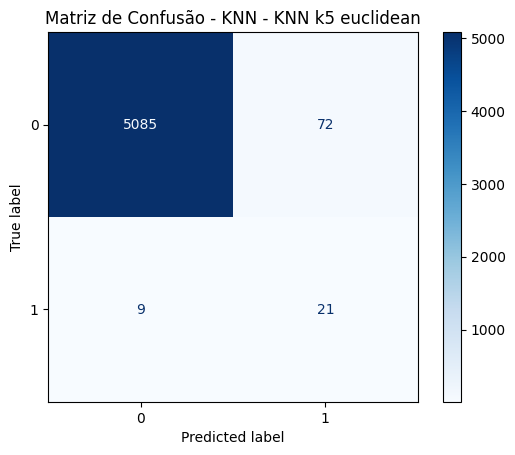

Treinando o modelo: KNN - KNN k10 euclidean 


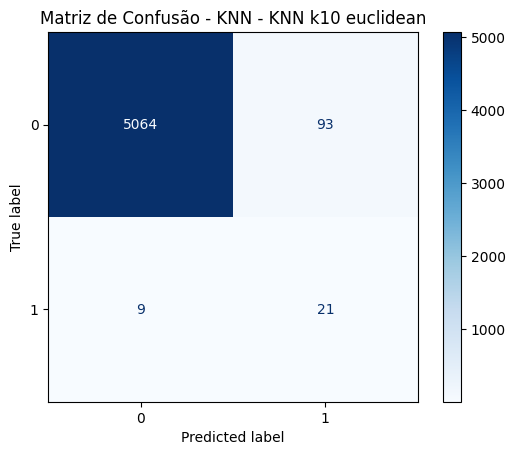

Treinando o modelo: KNN - KNN k15 euclidean 


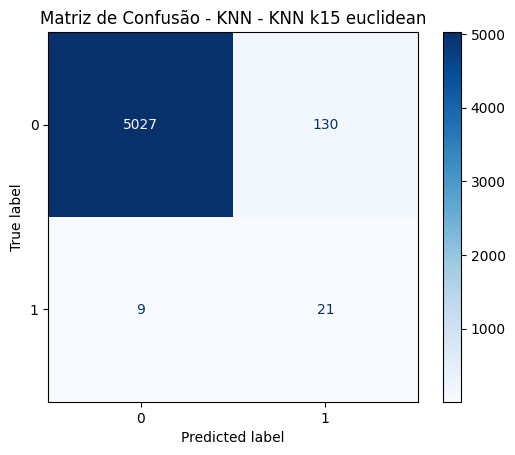

Treinando o modelo: KNN - KNN k20 euclidean 


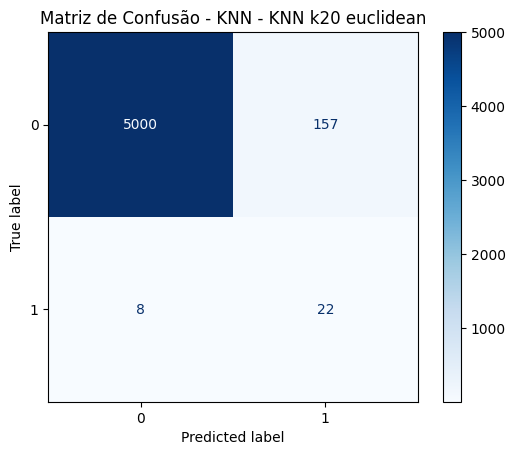

Treinando o modelo: KNN - KNN k5 manhatan 


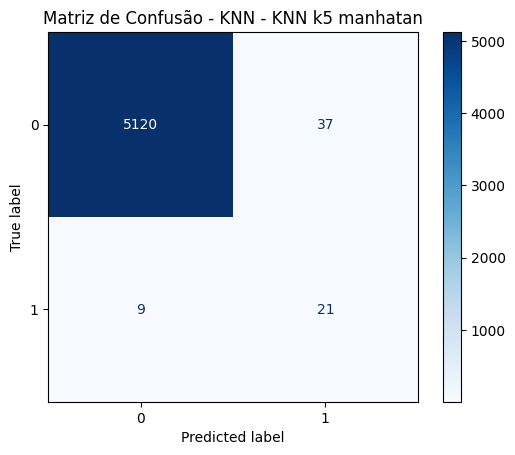

Treinando o modelo: KNN - KNN k10 manhatan 


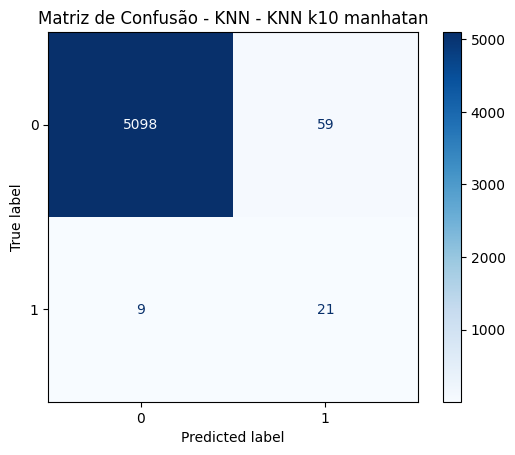

Treinando o modelo: KNN - KNN k15 manhatan 


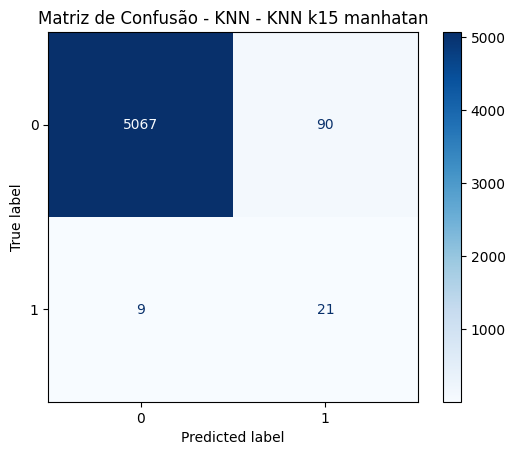

Resultados médios (Cross-Validation):
                                   Modelo  Accuracy  Precision    Recall  \
0                LG - Logistic Regression  0.867203   0.034109  0.808333   
1             LG - Logistic Regression cw  0.865324   0.033580  0.800000   
3             DT - Decision Tree md5 gini  0.985780   0.262092  0.783333   
11                KNN - KNN k20 euclidean  0.963752   0.106772  0.716667   
4          DT - Decision Tree md5 entropy  0.993348   0.461978  0.708333   
2            DT - Decision Tree md10 gini  0.985973   0.250394  0.708333   
10                KNN - KNN k15 euclidean  0.968235   0.117726  0.691667   
9                 KNN - KNN k10 euclidean  0.980189   0.182072  0.691667   
6      RF - Random Forest ne100 md10 gini  0.992818   0.426953  0.650000   
7   RF - Random Forest ne100 md10 entropy  0.995758   0.642456  0.650000   
8                  KNN - KNN k5 euclidean  0.986407   0.245544  0.641667   
5       RF - Random Forest ne50 md10 gini  0.99252

In [265]:
resultados = []
roc_data = {}

for nome, modelo in modelos.items():
    print(f"Treinando o modelo: {nome} " )

    pipeline = ImbPipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("smote", SMOTE()),
            ("modelo", modelo)
        ]
    )

    scores = cross_validate(
        pipeline, x_train, y_train, cv=cv, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"], return_train_score=False
    )

    resultados.append({
        "Modelo": nome,
        "Accuracy": scores["test_accuracy"].mean(),
        'Precision': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean(),
        'F1': scores['test_f1'].mean(),
        'ROC_AUC': scores['test_roc_auc'].mean(),
    })

    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    y_prob = pipeline.predict_proba(x_test)[:,1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_data[nome] = {"fpr": fpr, "tpr": tpr, "auc": auc(fpr,tpr)}


    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de Confusão - {nome}")
    plt.show()

resultados_df = pd.DataFrame(resultados).sort_values(by="Recall", ascending=False)
print(f"Resultados médios (Cross-Validation):")
print(resultados_df)


### 7. Avaliação de Modelos

In [267]:
#o melhor resultado levando em consideração a métrica Recall foi a Logistic Regression sem parametrização
#que mede a capacidade do modelo identificar corretamente os positivos reais
#essa métrica é a mais importante para os casos de fraudes

pd.DataFrame(resultados)

,Modelo,Accuracy,Precision,Recall,F1,ROC_AUC
0,LG - Logistic Regression,0.867203,0.034109,0.808333,0.065444,0.906228
1,LG - Logistic Regression cw,0.865324,0.033580,0.800000,0.064434,0.916645
2,DT - Decision Tree md10 gini,0.985973,0.250394,0.708333,0.369563,0.844444
3,DT - Decision Tree md5 gini,0.985780,0.262092,0.783333,0.391297,0.895019
4,DT - Decision Tree md5 entropy,0.993348,0.461978,0.708333,0.557098,0.844021
5,RF - Random Forest ne50 md10 gini,0.992529,0.411433,0.616667,0.489895,0.936720
6,RF - Random Forest ne100 md10 gini,0.992818,0.426953,0.650000,0.513208,0.930144
7,RF - Random Forest ne100 md10 entropy,0.995758,0.642456,0.650000,0.644154,0.934137
8,KNN - KNN k5 euclidean,0.986407,0.245544,0.641667,0.354527,0.844280
9,KNN - KNN k10 euclidean,0.980189,0.182072,0.691667,0.288111,0.857473


### 8. Comporativo de Performances

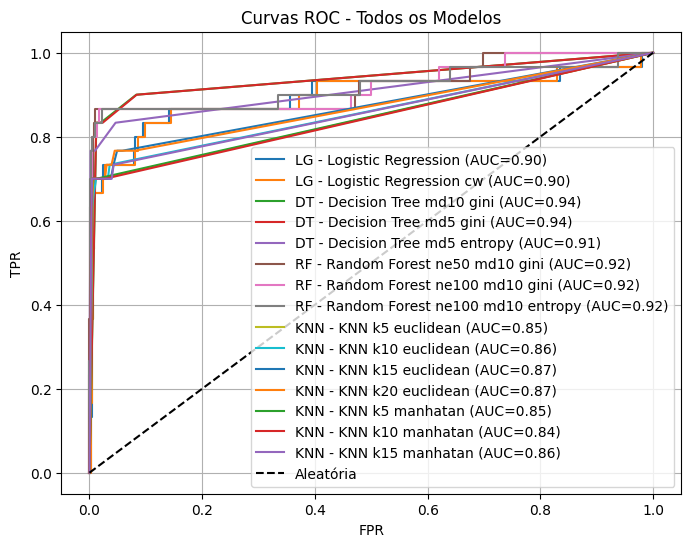

In [266]:

plt.figure(figsize=(8,6))
for nome, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f'{nome} (AUC={data["auc"]:.2f})')

plt.plot([0,1], [0,1], 'k--', label='Aleatória')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curvas ROC - Todos os Modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
